<a href="https://colab.research.google.com/github/anis-dela/houseprediction/blob/main/%5B0%5D_Project_1_Housing_Prediction_Portfolio_Anis_Dela_Desela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem Statement

A real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices


This company specifically considering area of the property and prefered area to choose
However, they are open to the possibility that other variables may also affect the price of a home

The data source that I'm using in this Analysis is from Kaggle : [Housing Price Prediction](https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression)




#Data Overview

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import library

#Load data
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
import statsmodels.formula.api as smf

#Statistics
import scipy.stats as stats

In [ ]:
housing = pd.read_csv("/content/drive/MyDrive/Pacmann/Project/Python Project/Linear Regression Project - Housing.csv")
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
#Get the information of rows & columns
housing.shape

(545, 13)

In [ ]:
housing.min()

price                 1750000
area                     1650
bedrooms                    1
bathrooms                   1
stories                     1
mainroad                   no
guestroom                  no
basement                   no
hotwaterheating            no
airconditioning            no
parking                     0
prefarea                   no
furnishingstatus    furnished
dtype: object

- The data consists of 545 rows & 13 columns



In [ ]:
#Get the datatype in each columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


- From the info above, some data are considered as object. However, those data are stored in a categorical format. Therefore I would like to encode those data to numerical value in order to be processed

In [ ]:
#Checking the number of unique object in each variables
x = ["mainroad","guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea","furnishingstatus"]

for column in x:
  unique_values = housing[column].unique()
  print(f"Unique values in '{column}':{unique_values}")

Unique values in 'mainroad':['yes' 'no']
Unique values in 'guestroom':['no' 'yes']
Unique values in 'basement':['no' 'yes']
Unique values in 'hotwaterheating':['no' 'yes']
Unique values in 'airconditioning':['yes' 'no']
Unique values in 'prefarea':['yes' 'no']
Unique values in 'furnishingstatus':['furnished' 'semi-furnished' 'unfurnished']


In [ ]:
#Label encoding categorical data to numerical value
housing['mainroad'] = housing['mainroad'].map({'yes':1, 'no':0})
housing['guestroom'] = housing['guestroom'].map({'yes':1, 'no':0})
housing['basement'] = housing['basement'].map({'yes':1, 'no':0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes':1, 'no':0})
housing['airconditioning'] = housing['airconditioning'].map({'yes':1, 'no':0})
housing['prefarea'] = housing['prefarea'].map({'yes':1, 'no':0})
housing['furnishingstatus'] = housing['furnishingstatus'].map({'unfurnished':1, 'semi-furnished':2, 'furnished':3})

In [ ]:
#Re-checking the data information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


- all of the string datatype variables have turned into int64

In [ ]:
#Missing Value
missing_value = housing.isnull().sum()
print(missing_value)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


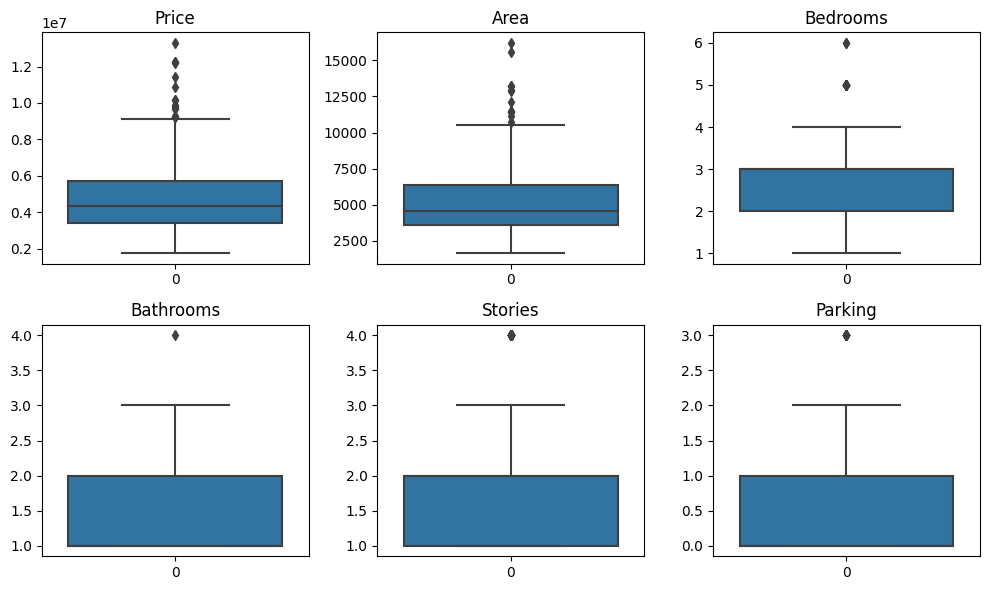

In [ ]:
#Outlier checking for numerical data
fig, axs = plt.subplots(2, 3, figsize = (10,6))

sns.boxplot(housing['price'], ax=axs[0, 0]).set_title('Price')
sns.boxplot(housing['area'], ax=axs[0, 1]).set_title('Area')
sns.boxplot(housing['bedrooms'], ax=axs[0, 2]).set_title('Bedrooms')
sns.boxplot(housing['bathrooms'], ax=axs[1, 0]).set_title('Bathrooms')
sns.boxplot(housing['stories'], ax=axs[1, 1]).set_title('Stories')
sns.boxplot(housing['parking'], ax=axs[1, 2]).set_title('Parking')

plt.tight_layout()
plt.show()

- Quite a large amount of outlier in 'Price' and 'Area' metrics
- However, other metrics have the potential of outliers due to each house property diversities, which make sense
- Next, I'd like to cut off the outliers of 'Price' & 'Area' from the data

In [ ]:
#Cutting off Price column's outlier
Q1 = housing['price'].quantile(0.25)
Q3 = housing['price'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#housing = housing[(housing['price']>= lower_bound) & (housing['price']<= upper_bound)]

#Cutting off Area column's outlier
Q1 = housing['area'].quantile(0.25)
Q3 = housing['area'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#housing = housing[(housing['area']>= lower_bound) & (housing['area']<= upper_bound)]

#Visualization

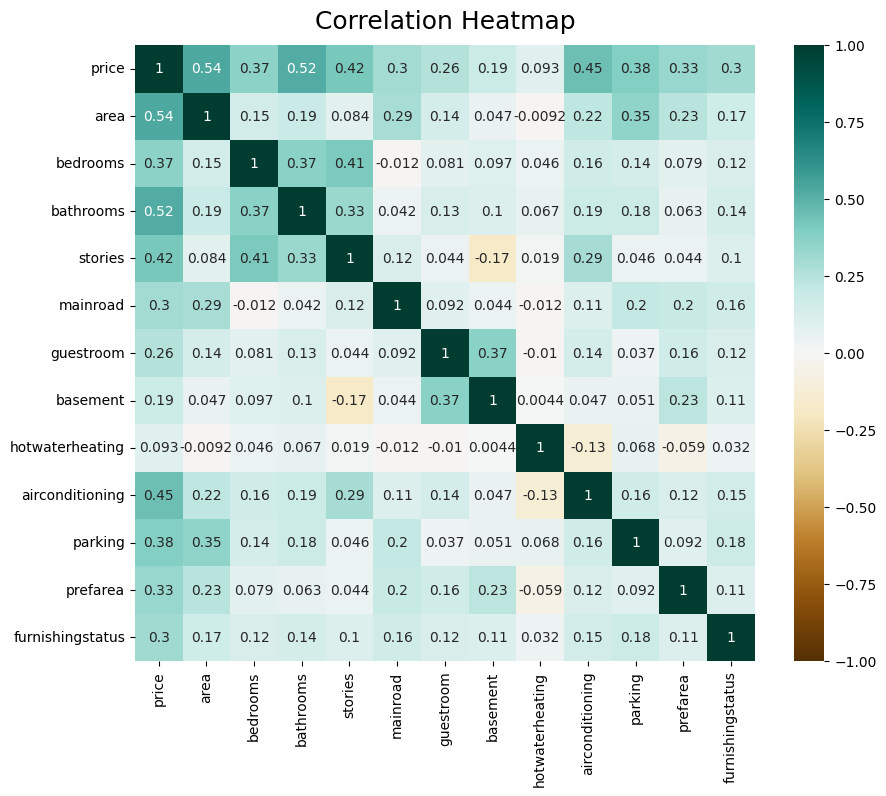

In [ ]:
#Correlation checking
plt.figure(figsize=(10, 8))

col = housing.columns
heatmap = sns.heatmap(housing[col].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- By looking at the correlation, the variables that have quite high correlation with price are area and bathrooms
- The other variables have lower than |0.5| correlation with price
- Price and bathroom might significantly affecting the price, however we still want to know which variables create the best model

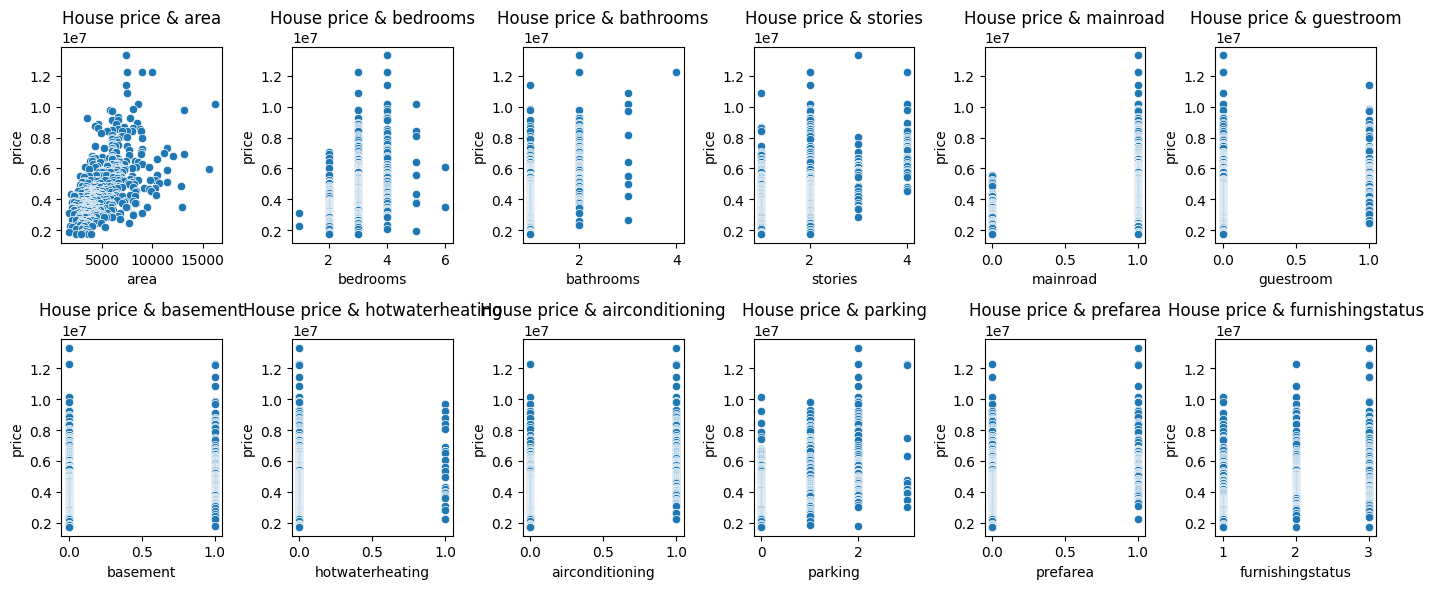

In [ ]:
#Visualization between all variables & price
columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus']

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(14, 6))
for i, ax in zip(columns, axes.flatten()):
  sns.scatterplot(y = "price", x = i, data = housing, ax=ax)
  ax.set_title(f"House price & {i}")

plt.tight_layout()

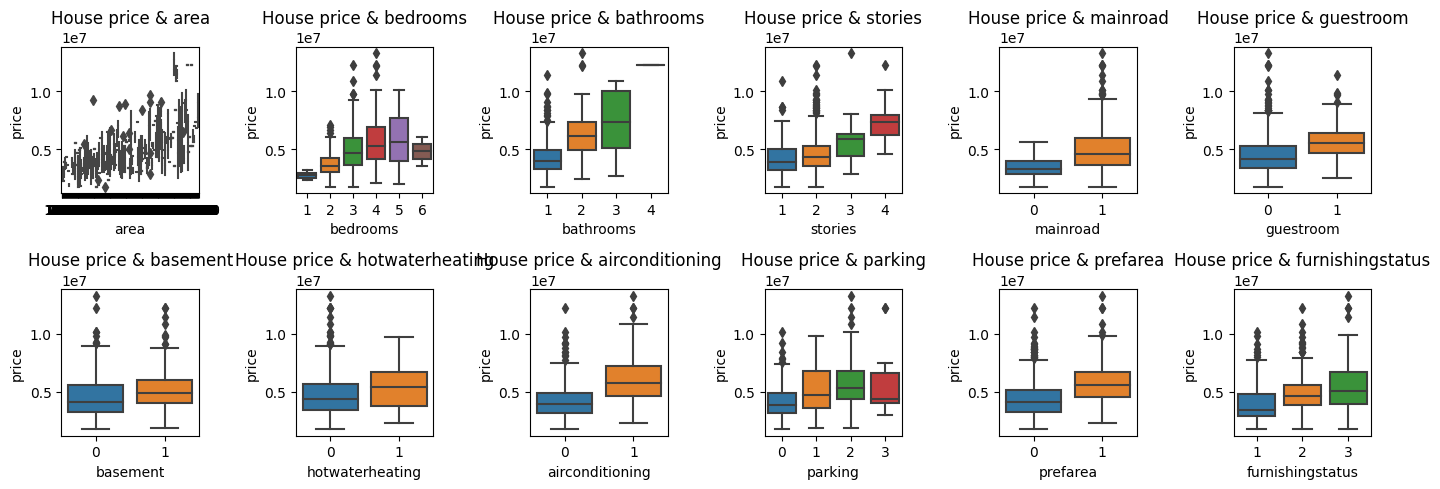

In [ ]:
#Visualization boxplot between all variables & price (to see the median)
columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus']

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(14, 5))
for i, ax in zip(columns, axes.flatten()):
  sns.boxplot(y = "price", x = i, data = housing, ax=ax)
  ax.set_title(f"House price & {i}")

plt.tight_layout()

- all variables tend to have a positive relation, which shown the higher the variables value, the house price will also become higher

#Create Model

###Model 1 - OLS with All Variables

In [ ]:
#Create OLS model object
model_all = smf.ols("price ~  area + bedrooms + bathrooms + stories + \
                    mainroad + guestroom + basement + hotwaterheating +\
                    airconditioning + parking + furnishingstatus", housing)

#Fit model
results_all = model_all.fit()
print(results_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     94.61
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.27e-117
Time:                        02:20:17   Log-Likelihood:                -8348.5
No. Observations:                 545   AIC:                         1.672e+04
Df Residuals:                     533   BIC:                         1.677e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6.771e+05   2.54e+05  

Text(0.5, 1.0, 'Residuals vs. Predicted price')

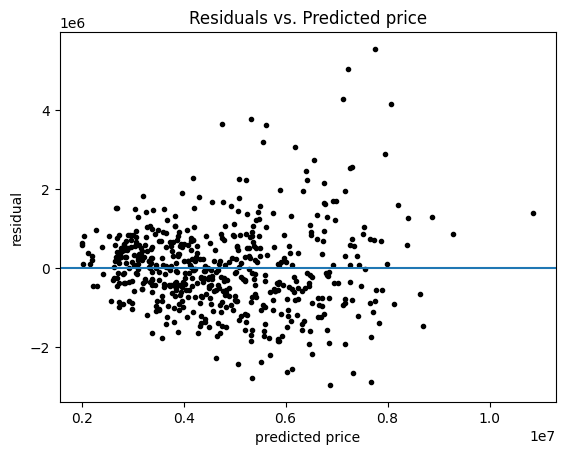

In [ ]:
plt.scatter(results_all.fittedvalues, results_all.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted price")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted price")

- Exhibited a plot that tends to form a pattern, which has an increasing trend
- This suggests that the error variance increases with the dependent variable

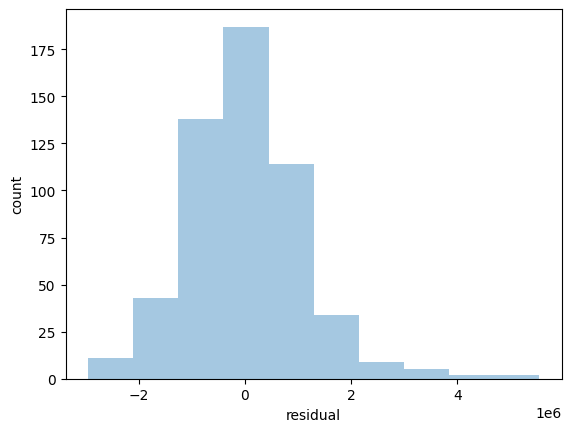

In [ ]:
plt.hist(results_all.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

- this model distribution is skewed to the right (posiive skewness)

###Model 2 - OLS with All Variables (Box-Cox Transformation)

####Transforming the price variable with Box-Cox transformation

In [ ]:
housing['price'], lambda_value = stats.boxcox(housing['price'])

In [ ]:
print(f"Lambda optimal: {lambda_value}")

Lambda optimal: -0.13464660792967653


In [ ]:
λ = lambda_value
λ

-0.13464660792967653

####Create OLS model after Box-Cox transformation

In [ ]:
model_all = smf.ols("price ~ area  + bedrooms + bathrooms + stories + \
                     mainroad + guestroom + basement + hotwaterheating +\
                     airconditioning + parking + furnishingstatus", housing)

results_all = model_all.fit()
print(results_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     96.96
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.71e-119
Time:                        02:20:18   Log-Likelihood:                 1189.6
No. Observations:                 545   AIC:                            -2355.
Df Residuals:                     533   BIC:                            -2304.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.3364      0.006  

####Feature Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6.611014,7420,4,2,3,1,0,0,0,1,2,1,3
1,6.601930,8960,4,4,4,1,0,0,0,1,3,0,3
2,6.601930,9960,3,2,2,1,0,1,0,0,2,1,2
3,6.601612,7500,4,2,2,1,0,1,0,1,3,1,3
4,6.594002,7420,4,1,2,1,1,1,0,1,2,0,3


In [ ]:
y = housing['price']
y

0      6.611014
1      6.601930
2      6.601930
3      6.601612
4      6.594002
         ...   
540    6.360481
541    6.356241
542    6.354834
543    6.354834
544    6.354834
Name: price, Length: 545, dtype: float64

In [ ]:
X = housing.drop(["price"], axis = 1)
X.head(1)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,3


In [ ]:
# Initialize the SequentialFeatureSelector model
model = LinearRegression()
sfs = SequentialFeatureSelector(model, direction="forward")

# Fit the SequentialFeatureSelector model
sfs.fit(X, y)

# Select the features
selected_features = sfs.get_support()

# Print the selected features
print(selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


[ True False  True  True False  True False False  True False  True False]


####Chosen Model

In [ ]:
model_all = smf.ols("price ~ area + bathrooms + stories + \
                      guestroom + prefarea + airconditioning", housing)

results_all = model_all.fit()
print(results_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     140.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.67e-106
Time:                        02:20:19   Log-Likelihood:                 1146.5
No. Observations:                 545   AIC:                            -2279.
Df Residuals:                     538   BIC:                            -2249.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.3710      0.005   13

Model:

  $$\text{price} = 1381.7 + 12.6\text{area} + 9.3\text{bathrooms} + 7.3\text{stories} + 4.5\text{guestroom} + 6.5\text{prefarea} + 7.6\text{airconditioning}$$

####Residual Visualization

Text(0.5, 1.0, 'Residuals vs. Predicted price')

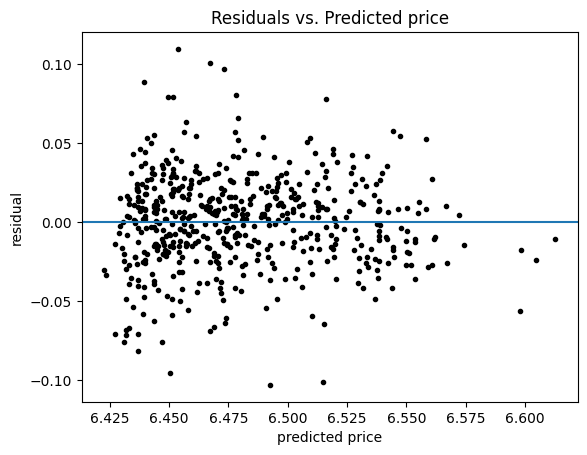

In [ ]:
plt.scatter(results_all.fittedvalues, results_all.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted price")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted price")

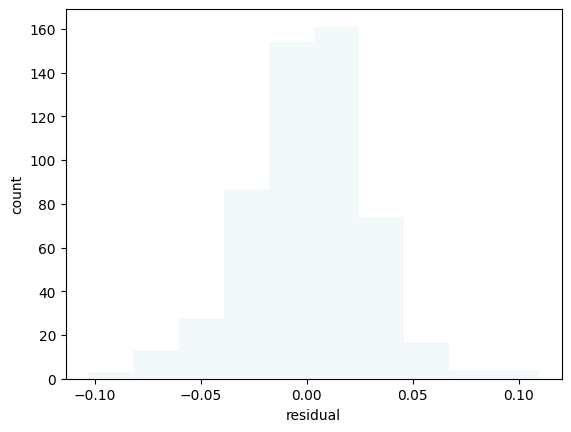

In [ ]:
plt.hist(results_all.resid, color='tab:blue', alpha=0.05)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

###Case Study

In [ ]:
area = 5000
bathrooms = 1
stories = 2
guestroom = 0
prefarea = 1
airconditioning = 1

In [ ]:
y_transformed = 6.3710 + (7.88*10**(-6))*area + 0.0254*bathrooms +\
                 0.0117*stories + 0.0153*guestroom + 0.0204*prefarea +\
                 0.0224*airconditioning
y_transformed

6.502000000000001

In [ ]:
y_original = ((y_transformed * λ) + 1) ** (1 / λ)
y_original

5239881.2829040475